In [3]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [4]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [5]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [6]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'
saving_dataset_path = r'h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\Pythonwin', '/hom

In [7]:
from fitting.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [9]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [19]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [20]:
from experiments.dataset import *
from experiments.dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [21]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.415,0.010,0.977143,0.488571,3000,2024-10-26 17:42:46.915401
1,M1-S2,520.925,0.010,1.130904,0.565452,5000,2024-10-26 17:43:09.376354
2,M1-S3,696.665,0.010,1.333910,0.666955,9000,2024-10-26 17:43:34.019332
3,M1-S4,875.845,0.010,1.254287,0.627144,9000,2024-10-26 17:43:51.867832
4,M1-S5,1053.395,0.010,1.973198,0.986599,7500,2024-10-26 17:44:14.975970
5,M1-S6,1245.160,0.010,1.595310,0.797655,13500,2024-10-26 17:44:34.143253
6,M1-S7,1423.040,0.010,1.685008,0.842504,13500,2024-10-26 17:44:51.587301
7,M1-S8,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3


# Load RBAM Expt data

In [22]:
name = 'all_storage_rbam'
folder =  folder # Ensure this variable is defined in your script

# Ensure the folder exists
os.makedirs(folder, exist_ok=True)

# File path to save the DataFrame
file_path = os.path.join(folder, f"{name}.csv")

# Save the DataFrame to a CSV file
df_all_rbam = pd.read_csv(file_path)

print(f"DataFrame read from {file_path}")

DataFrame read from H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\all_storage_rbam.csv


In [23]:
df_all_rbam['fidelity'][0]

'[0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]'

# Load BS Data

In [24]:
# load BS data frame (without spectators)
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

,Mode,file_list,name,fids_list,fids_post_list,fid,fid_err,fid_post,fid_post_err,Depth fit up to,...,ge_list,eg_list,ee_list,gg_list_err,ge_list_err,eg_list_err,ee_list_err,ebars_list,ebars_post_list,depth_fit_up_to
0,1,"[548, 549, 550, 551, 552, 553, 554, 555, 556, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.933563187108675, 0.92539176866761, 0.908718...","[0.994865836316126, 0.993013098261554, 0.99046...",0.996652,0.000072,0.998779,0.000169,2000,...,"[0.9085502306183065, 0.9057903676411931, 0.887...","[0.004686333863849433, 0.00637849709117257, 0....","[0.06175047902747567, 0.06822973424121748, 0.0...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0004359989629942819, 0.0006174559521902646,...","[0.0015981747296314585, 0.0018304495944191988,...","[0.0016098005294681022, 0.0018226997647139613,...","[0.0004799021448033312, 0.0006728531999346926,...",2000
1,2,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9356514245251336, 0.9242189803653471, 0.914...","[0.9950886744818882, 0.9935122956231536, 0.991...",0.997613,0.000013,0.999754,0.000101,2000,...,"[0.8957272139719534, 0.8840266115577843, 0.873...","[0.0044322282288122945, 0.005776719908511158, ...","[0.05991634724605409, 0.07000429972614167, 0.0...","[0.0022832745775030047, 0.0018772482133232158,...","[0.0022832745775030047, 0.0018772482133232158,...","[0.00043983346018930907, 0.0004906753514151476...","[0.0018721113801848717, 0.001540946897328571, ...","[0.0016098005294681022, 0.0018226997647139613,...","[0.00048243060740322136, 0.0005523446792671511...",2000
2,3,"[590, 591, 592, 593, 594, 595, 596, 597, 598, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.932848556683558, 0.9184909395360339, 0.9043...","[0.9953260202637892, 0.9926657260845021, 0.991...",0.997000,0.000019,0.999229,0.000145,2000,...,"[0.8890630812784109, 0.8752246533122903, 0.861...","[0.0041724998020788145, 0.006467488235228106, ...","[0.06297894351436314, 0.07504157222873784, 0.0...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0003559383392788671, 0.0005238370770952343,...","[0.001176226769595588, 0.001570598764562083, 0...","[0.0018364832264220945, 0.0014975954861458222,...","[0.00039949444035114164, 0.0005909073629860316...",2000
3,4,"[611, 612, 613, 614, 615, 616, 617, 618, 619, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9224996506107835, 0.8977564150549788, 0.877...","[0.9924848735561859, 0.9889322008290996, 0.985...",0.993877,0.000050,0.996009,0.000355,2000,...,"[0.8953524548427165, 0.8707604852155324, 0.853...","[0.006783837945321119, 0.00973645686574578, 0....","[0.07071651144389529, 0.0925071280792755, 0.10...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0005176444615874594, 0.0006221573958370889,...","[0.0016800866418539158, 0.0019553545429684908,...","[0.0018364832264220945, 0.0014975954861458222,...","[0.0005700234403086111, 0.0007143665655444077,...",2000
4,5,"[632, 633, 634, 635, 636, 637, 638, 639, 640, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.924224701154291, 0.8972516351072528, 0.8680...","[0.994061657262647, 0.9914303178857917, 0.9861...",0.993209,0.000068,0.997944,0.000094,2000,...,"[0.9077750642910327, 0.8827509904350767, 0.851...","[0.0054231752960300465, 0.007617899645197445, ...","[0.07035212354967885, 0.0951304652475498, 0.11...","[0.001587489521038847, 0.0023662620250462256, ...","[0.001587489521038847, 0.0023662620250462256, ...","[0.00041051773797976297, 0.0006694071490576667...","[0.0012095062061867597, 0.0021735478521388344,...","[0.0012115656976351553, 0.001564185678578712, ...","[0.00045023043163391213, 0.0007583637132156032...",2000
5,6,"[653, 654, 655, 656, 657, 658, 659, 660, 661, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.890094859149635, 0.8900864880228737

# Collecting all errors

## get times for gate and idle

In [94]:
# def get_gate_time(mode): 
#     ''' 
#     gets BS time for a given mode
#     mode= S1, S2, ...
#     '''
#     return ds_stor_man_swap[''] 

def get_gate_time(mode): 
    ''' 
    gets BS time for a given mode
    mode= S1, S2, ...
    '''
    row = ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name']=='M1-' + str(mode)]
    return row['pi (mus)'].values[0] 

def get_M1Si_idle_time(mode): 
    ''' 
    gets idle time for a given mode when other modes are being acted upon
    mode= S1, S2, ...

    time for M1-S2, M1-S3, M1-S4, M1-S5, M1-S6, M1-S7 if target mode is S1
    '''
    modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
    time = 0 
    for m in modes:
        if m != mode:
            time += get_gate_time(m)
    return time

def get_loading_time(): # loading a single photon excitation into M1
    '''
    time to prepare OR stor a state into M1

    ge_pulse + ef_pulse + f0g1_pulse
    '''
    ge_pulse = 35 * 4 *1e-3
    ef_pulse = 35 * 4 * 1e-3
    M1_pulse = ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1']['pi (mus)'].values[0]
    return ge_pulse + ef_pulse + M1_pulse


# def get_f0g1_idle_time(mode): #
#     ''' 
#     gets BS time for a given mode
#     mode= S1, S2, ...
#     '''
#     modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
#     time = 0 
#     for m in modes:
#         if m != mode:
#             time += get_loading_time() * 1
#     return time


    

In [95]:
columns = ['Mode', 'gate_time', 'f0g1_other_spec_targ_idle', 'M1_Si_other_spec_targ_idle']
modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

data = []
for mode in modes:
    gate_time = get_gate_time(mode)
    f0g1_idle_time = get_loading_time() *6#get_f0g1_idle_time(mode)
    M1_Si_other_spec_targ_idle = get_M1Si_idle_time(mode)
    data.append([mode, gate_time, f0g1_idle_time, M1_Si_other_spec_targ_idle])

df_master = pd.DataFrame(data, columns=columns)
df_master



,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle
0,S1,0.977143,5.314091,8.972618
1,S2,1.130904,5.314091,8.818856
2,S3,1.333910,5.314091,8.615850
3,S4,1.254287,5.314091,8.695473
4,S5,1.973198,5.314091,7.976562
5,S6,1.595310,5.314091,8.354450
6,S7,1.685008,5.314091,8.264752


## Coherence

### Get the T1s

In [97]:
t1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
freq_t1s = [1/t1 for t1 in t1s]
df_master['kappa_t1s (MHz)'] = freq_t1s
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791
1,S2,1.130904,5.314091,8.818856,0.000797
2,S3,1.333910,5.314091,8.615850,0.001252
3,S4,1.254287,5.314091,8.695473,0.001674
4,S5,1.973198,5.314091,7.976562,0.002811
5,S6,1.595310,5.314091,8.354450,0.001696
6,S7,1.685008,5.314091,8.264752,0.002694


In [98]:
# omega = f * 2pi

### Get the T2s

In [99]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ModeT2s_and_echoes.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_t2_and_echo = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ModeT2s_and_echoes.csv


In [100]:
df_t2_and_echo

,target,type,file_no,name,t2,t2_err,return_args
0,1,T2,90,_stor_cavity_ramsey_sweep.h5,235.687931,7.102034,"[[1.8099999999999998, 3.6099999999999994, 5.40..."
1,1,T2_echo,91,_stor_cavity_ramsey_sweep.h5,551.567706,16.846464,"[[3.02, 6.02, 9.02, 12.02, 15.02, 18.02, 21.02..."
2,2,T2,92,_stor_cavity_ramsey_sweep.h5,378.310633,15.076063,"[[6.01, 12.01, 18.01, 24.01, 30.01, 36.01, 42...."
3,2,T2_echo,93,_stor_cavity_ramsey_sweep.h5,1493.194215,53.469139,NaN
4,3,T2,94,_stor_cavity_ramsey_sweep.h5,677.194120,16.847612,"[[4.81, 9.61, 14.409999999999998, 19.21, 24.01..."
5,3,T2_echo,95,_stor_cavity_ramsey_sweep.h5,1309.914525,41.804243,"[[8.02, 16.02, 24.02, 32.02, 40.02, 48.02, 56...."
6,4,T2,96,_stor_cavity_ramsey_sweep.h5,806.227803,23.684860,"[[4.21, 8.41, 12.610000000000001, 16.810000000..."
7,4,T2_echo,97,_stor_cavity_ramsey_sweep.h5,972.376941,29.846202,"[[7.02, 14.02, 21.02, 28.02, 35.02, 42.02, 49...."
8,5,T2,98,_stor_cavity_ramsey_sweep.h5,591.843259,15.246132,"[[3.6099999999999994, 7.209999999999999, 10.80..."
9,5,T2_echo,99,_stor_cavity_ramsey_sweep.h5,663.338928,22.742345,"[[6.02, 12.02, 18.02, 24.02, 30.02, 36.02, 42...."


In [200]:
# choose rows where type is 'T2'
reduced_df = df_t2_and_echo[df_t2_and_echo['type'] == 'T2']
reduced_df2= df_t2_and_echo[df_t2_and_echo['type'] == 'T2_echo']
T2s = reduced_df['t2'].values
T2echoes = reduced_df2['t2'].values
T2s


array([ 235.68793121,  378.31063271,  677.19411992,  806.22780296,
        591.84325896, 1071.07007883,  663.54407829])

In [201]:
freqs_t2s = 1/T2s 
freqs_t2echoes = 1/T2echoes

In [202]:
# add T2s to the master DataFrame
df_master['kappa_T2 (MHz)'] =  freqs_t2s
df_master['kappa_T2_echo (MHz)'] =  freqs_t2echoes
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),coherence_err,idle:coherence_err,gate: coherence_err,gate_mbd_err,thermal_photon_err,idle_err_due_to_spec_gates,MBD_idle_err,idle:decay_err,idle:dephasing_err,gate: decay_err,gate: dephasing_err,kappa_T2_echo (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791,0.004243,0.060617,0.060617,0.004146,0.010,0.0125,0.066613,0.007280,0.039874,0.005965,0.002727,0.000408,0.001813
1,S2,1.130904,5.314091,8.818856,0.000797,0.002643,0.037358,0.037358,0.002989,0.010,0.0125,0.046811,0.003284,0.011263,0.003833,0.000901,0.000307,0.000670
2,S3,1.333910,5.314091,8.615850,0.001252,0.001477,0.020570,0.020570,0.001970,0.002,0.0125,0.026530,0.002157,0.017434,0.001917,0.001669,0.000184,0.000763
3,S4,1.254287,5.314091,8.695473,0.001674,0.001240,0.023451,0.023451,0.002100,0.010,0.0125,0.016624,0.001822,0.023451,0.002682,0.002100,0.000240,0.001028
4,S5,1.973198,5.314091,7.976562,0.002811,0.001690,0.037365,0.037365,0.005547,0.002,0.0125,0.011877,0.002151,0.037365,0.001354,0.005547,0.000201,0.001508
5,S6,1.595310,5.314091,8.354450,0.001696,0.000934,0.023187,0.023187,0.002706,0.004,0.0250,0.033511,0.002007,0.023187,0.001445,0.002706,0.000169,0.000954
6,S7,1.685008,5.314091,8.264752,0.002694,0.001507,0.036581,0.036581,0.004539,0.004,0.0125,0.009145,0.003094,0.036581,0.001313,0.004539,0.000163,0.001444


### Idling: Coherence Error

In [203]:
# get the max of the two and multiply by f0g1+M1si idle time 
decay_errs = []
dephasing_errs = []
for idx, mode in enumerate(modes): 
    kappa_t1 = df_master['kappa_t1s (MHz)'][idx]
    kappa_t2 = df_master['kappa_T2_echo (MHz)'][idx]
    f0g1_idle_time = df_master['f0g1_other_spec_targ_idle'][idx]
    M1_Si_idle_time = df_master['M1_Si_other_spec_targ_idle'][idx]
    decay_err = kappa_t1 * (f0g1_idle_time + M1_Si_idle_time)
    dephasing_err = (kappa_t2 - (kappa_t1/2)) * (f0g1_idle_time + M1_Si_idle_time)
    decay_errs.append(decay_err)
    dephasing_errs.append(dephasing_err)

print('decay_errs:', decay_errs)
print('dephasing_errs:', dephasing_errs)


decay_errs: [0.03987359278712749, 0.01126310739789358, 0.017434219214982023, 0.023450893354952932, 0.03736478262323427, 0.023186668636524705, 0.03658093487332035]
dephasing_errs: [0.005965206461357152, 0.0038333551637390094, 0.0019171271178765887, 0.0026820974571391634, 0.0013536002628527623, 0.0014447304179216298, 0.0013132133043399423]


In [204]:
# df_master['idle:coherence_err'] = coherence_errs
df_master['idle:decay_err'] = decay_errs
df_master['idle:dephasing_err'] = dephasing_errs


### Gate: Coherence Error

In [205]:
# get the max of the two and multiply by f0g1+M1si idle time 
coherence_errs = []
decay_errs = []
dephasing_errs = []
for idx, mode in enumerate(modes): 
    kappa_t1 = df_master['kappa_t1s (MHz)'][idx]
    kappa_t2 = df_master['kappa_T2_echo (MHz)'][idx]
    gate_time = get_gate_time(mode)
    # coherence_err = max(kappa_t1, kappa_t2) * gate_time
    # coherence_errs.append(coherence_err)
    decay_err = kappa_t1 * gate_time
    dephasing_err = (kappa_t2 - (kappa_t1/2)) * gate_time
    decay_errs.append(decay_err)
    dephasing_errs.append(dephasing_err)
    
coherence_errs
print('decay_errs:', decay_errs)
print('dephasing_errs:', dephasing_errs)

decay_errs: [0.0027271639886766877, 0.0009012623445120897, 0.0016694743429286607, 0.0020995772723832497, 0.00554736568368346, 0.002706208637047196, 0.004539353792548823]
dephasing_errs: [0.00040799173360888107, 0.0003067411629995706, 0.00018358117997491495, 0.00024013033440096836, 0.00020096238009170464, 0.00016862025314949794, 0.00016295755737584332]


In [206]:
# df_master['gate: coherence_err'] = coherence_errs
df_master['gate: decay_err'] = decay_errs
df_master['gate: dephasing_err'] = dephasing_errs


In [207]:
get_gate_time('S3')

1.33391

## Cross Kerr due to M1-Si gates

In [208]:
folder = os.path.join(parent_path, 'RAM_paper_results', 'datasets')
file_name = 't2s_with_spectators.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_ckerr_m1si = pd.read_csv(file_path)#, index=False)

print(f"DataFrame read from {file_path}")

DataFrame read from c:\_Lib\python\multimode_expts\RAM_paper_results\datasets\t2s_with_spectators.csv


In [209]:
target = 'S1'
df_master[df_master['Mode'] == target]['kappa_T2 (MHz)'].values[0]


0.004242898628076846

In [210]:
ckerr_m1_si_mat = np.zeros((7,7))
ckerr_m1_si_mat_err = np.zeros((7,7))
t2_mat = np.zeros((7,7))
for i, row in df_ckerr_m1si.iterrows():
    target = row['target']
    spec = row['spectator']
    kappa_with_spec = 1/row['t2']
    t2_mat[target -1][spec -1] = row['t2']
    
    bare_kappa = df_master[df_master['Mode'] == 'S' + str(target)]['kappa_T2 (MHz)'].values[0]
    print(f"target: {target}, spec: {spec}, kappa_with_spec: {kappa_with_spec}, bare_kappa: {bare_kappa}")
    ckerr_m1_si_mat[target -1][spec -1] =  kappa_with_spec - bare_kappa
    ckerr_m1_si_mat_err[target -1][spec -1] = row['t2_err']


target: 1, spec: 1, kappa_with_spec: 0.004901960784313725, bare_kappa: 0.004242898628076846
target: 1, spec: 2, kappa_with_spec: 0.004480153394000584, bare_kappa: 0.004242898628076846
target: 1, spec: 3, kappa_with_spec: 0.005332053222275509, bare_kappa: 0.004242898628076846
target: 1, spec: 4, kappa_with_spec: 0.01142485688171289, bare_kappa: 0.004242898628076846
target: 1, spec: 5, kappa_with_spec: 0.006868290878749489, bare_kappa: 0.004242898628076846
target: 1, spec: 6, kappa_with_spec: 0.015497340562596777, bare_kappa: 0.004242898628076846
target: 1, spec: 7, kappa_with_spec: 0.010739298445427916, bare_kappa: 0.004242898628076846
target: 2, spec: 1, kappa_with_spec: 0.0089471877363005, bare_kappa: 0.002643330410313463
target: 2, spec: 2, kappa_with_spec: 0.002173913043478261, bare_kappa: 0.002643330410313463
target: 2, spec: 3, kappa_with_spec: 0.0024169123188611226, bare_kappa: 0.002643330410313463
target: 2, spec: 4, kappa_with_spec: 0.005107577575897636, bare_kappa: 0.002643330

In [211]:
target = 1
spec = 6
t2_mat[target - 1][spec - 1]

64.52720039033828

In [212]:
ckerr_m1_si_mat_err

array([[ 0.        ,  5.43149883,  3.39881354,  1.65499297,  2.46240744,
         1.67367514,  1.61460064],
       [ 6.65429163,  0.        ,  8.64862909,  3.63659085,  6.73511865,
         8.81940745,  1.26578795],
       [12.0091436 , 18.0065999 ,  0.        ,  6.36930454, 27.29189672,
        48.69404278, 16.87731689],
       [ 7.03372873, 17.29226844, 26.66957109,  0.        , 11.25510566,
        22.72167106,  4.20759232],
       [35.94982129, 22.9571514 , 21.13204739,  4.90618853,  0.        ,
        16.17077902,  4.0804276 ],
       [31.88557248, 30.20109845, 32.74770316,  2.56102235, 22.78410978,
         0.        ,  8.99369185],
       [21.25598214, 18.80392877, 26.14274875,  7.31570723, 11.57811015,
        19.12033955,  0.        ]])

In [213]:
0.001 * 1 * 2

0.002

In [214]:
import seaborn as sns

Diagonals mean nothing here 

Text(90.72222222222221, 0.5, 'Target Mode whose ramsey is being measured')

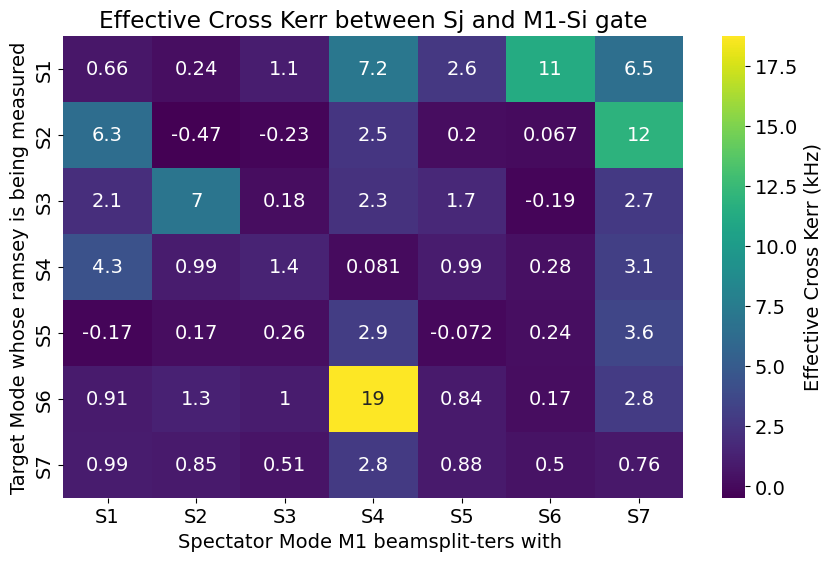

In [215]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

sns.heatmap(np.round(ckerr_m1_si_mat *1e3, 3), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Effective Cross Kerr (kHz)'})
ax1.set_title('Effective Cross Kerr between Sj and M1-Si gate')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode M1 beamsplit-ters with ')
ax1.set_ylabel('Target Mode whose ramsey is being measured')


In [ ]:
t_gate/T1

In [260]:
idle_err_due_to_specs = []
idle_err_due_to_spec_prod = []
for target_mode in modes:
    idle_err_due_to_spec = 0 # error due to loading and unloading from Si 
    net_fidelity = 1
    for spec_mode in modes:
        print(f"target_mode: {target_mode}, spec_mode: {spec_mode}")
        if target_mode != spec_mode:
            targ_idx = int(target_mode[1]) -1
            spec_idx = int(spec_mode[1]) -1
            ckerr = np.abs(ckerr_m1_si_mat[targ_idx][spec_idx])
            m1_si_gate_time = get_gate_time(spec_mode) * 1 # 2 for loading and unloading
            fid_spec_gate = (1 -(ckerr * m1_si_gate_time ))
            net_fidelity*= fid_spec_gate
            idle_err_due_to_spec += ckerr * m1_si_gate_time
            print(ckerr * m1_si_gate_time)
    idle_err_due_to_specs.append(idle_err_due_to_spec)
    idle_err_due_to_spec_prod.append(1-net_fidelity)
idle_err_due_to_specs
    

target_mode: S1, spec_mode: S1
target_mode: S1, spec_mode: S2
0.0002683123614044675
target_mode: S1, spec_mode: S3
0.001452834204747539
target_mode: S1, spec_mode: S4
0.009008240193890318
target_mode: S1, spec_mode: S5
0.005180418669158729
target_mode: S1, spec_mode: S6
0.017954323667338783
target_mode: S1, spec_mode: S7
0.010946486493636809
target_mode: S2, spec_mode: S1
0.006159769158535906
target_mode: S2, spec_mode: S2
target_mode: S2, spec_mode: S3
0.0003020213563691914
target_mode: S2, spec_mode: S4
0.0030908743243469954
target_mode: S2, spec_mode: S5
0.0003850120441646757
target_mode: S2, spec_mode: S6
0.00010608914677222604
target_mode: S2, spec_mode: S7
0.019965991194200852
target_mode: S3, spec_mode: S1
0.002013664541749672
target_mode: S3, spec_mode: S2
0.007913542889954198
target_mode: S3, spec_mode: S3
target_mode: S3, spec_mode: S4
0.002869927171097321
target_mode: S3, spec_mode: S5
0.003349975105122273
target_mode: S3, spec_mode: S6
0.0003025659861109521
target_mode: S3,

[0.04481061559017665,
 0.030009757224389845,
 0.020989510579414332,
 0.014780829763578612,
 0.010754906312642244,
 0.033680053675415905,
 0.008621791167661976]

In [261]:
idle_err_due_to_spec_prod

[0.04408805745835764,
 0.029783205266883495,
 0.020823288779839078,
 0.014698633453504972,
 0.010721981911812839,
 0.03340566646316945,
 0.008593676361461688]

In [262]:
df_master['idle_err_due_to_spec_gates'] = idle_err_due_to_spec_prod

## Many Body Dephasing

### Idling

In [248]:
# save dataframe
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ManyBodyDephasing.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_MBD = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManyBodyDephasing.csv


In [249]:
T2s = df_MBD['t2'].values
T2_errs = df_MBD['t2_err'].values

kappas = 1/T2s
kappa_errs = T2_errs / (T2s ** 2)
kappas, kappa_errs

df_MBD['kappas'] = kappas
df_MBD['kappa_errs'] = kappa_errs

In [250]:
df_MBD

,Unnamed: 0.1,Unnamed: 0,target,state_idx,file_no,name,t2,t2_err,p,pCov,xdata,idata,return_args,kappas,kappa_errs
0,0,0,1,0,90,_stor_cavity_ramsey_sweep.h5,278.042230,10.884967,[ 3.24240150e+02 2.80972092e-02 -3.74620490e+...,[[ 1.09038088e+16 -9.54145116e+01 3.11069106e...,[ 1.81 3.61 5.41 7.21 9.01 10.81 12...,"[-132.15446674537586, -81.4926948051948, -25.3...",NaN,0.003597,0.000141
1,1,1,1,1,22,_stor_cavity_ramsey_sweep.h5,290.866341,13.154786,[ 3.17205254e+02 2.81728391e-02 -4.34467770e+...,[[ 1.15052670e+16 8.32883738e+01 -2.68473223e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-134.0004214852085, -86.87475864257942, -30.3...",NaN,0.003438,0.000155
2,2,2,1,2,23,_stor_cavity_ramsey_sweep.h5,260.005531,9.453510,"[352.61802854947564, 0.02252252252252253, -53....",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-128.49311135112353, -95.4091829223408, -55.4...",NaN,0.003846,0.000140
3,3,3,1,3,24,_stor_cavity_ramsey_sweep.h5,285.860033,12.445693,[ 2.98245751e+02 2.77988125e-02 -4.43351771e+...,[[ 1.34342862e+16 -1.15520991e+02 1.90671907e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-137.93075129738415, -83.48585016593066, -20....",NaN,0.003498,0.000152
4,4,4,1,4,25,_stor_cavity_ramsey_sweep.h5,253.318176,10.196474,"[382.4504166493798, 0.02252252252252253, 59.50...",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-142.45235487404165, -111.91995732462264, -26...",NaN,0.003948,0.000159
5,5,5,1,5,26,_stor_cavity_ramsey_sweep.h5,281.408727,11.610525,[ 2.93444476e+02 2.78841355e-02 -4.88712750e+...,[[ 7.76562395e+15 1.47040584e+02 -5.77985856e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-141.12335001064508, -85.12480121918897, -27....",NaN,0.003554,0.000147
6,6,6,2,0,92,_stor_cavity_ramsey_sweep.h5,435.249214,17.516631,[ 3.37600375e+02 9.27565314e-03 1.35714631e+...,[[ 1.49710288e+16 -8.38181627e+01 8.60808244e...,[ 6.01 12.01 18.01 24.01 30.01 36.01 42...,"[3.4405705856010123, -45.609278879015726, -131...",NaN,0.002298,0.000092
7,7,7,2,1,30,_stor_cavity_ramsey_sweep.h5,480.860541,14.388364,[ 3.43782520e+02 9.30490906e-03 1.30964766e+...,[[ 3.47693459e+01 5.33715223e-07 -3.62759335e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[76.7657297339757, 34.58518767817549, -42.9902...",NaN,0.002080,0.000062
8,8,8,2,2,31,_stor_cavity_ramsey_sweep.h5,467.648602,21.497076,[ 2.77361608e+02 9.02182481e-03 1.19233027e+...,[[ 5.98011256e+01 -4.42052116e-06 4.37817552e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[79.25604201524446, 61.97823619469962, -19.346...",NaN,0.002138,0.000098
9,9,9,2,3,32,_stor_cavity_ramsey_sweep.h5,479.399206,17.607957,[ 3.12239323e+02 9.14896655e-03 1.28147621e+...,[[ 4.68575825e+01 -2.81721708e-07 3.75306936e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[96.05281077948422, 43.75738619832307, -27.001...",NaN,0.002086,0.000077


Storage 1: 0.51 +/- 0.20 kHz
Time: 1.96 +/- 4.92 ms
Storage 2: 0.23 +/- 0.13 kHz
Time: 4.30 +/- 7.88 ms
Storage 3: 0.15 +/- 0.07 kHz
Time: 6.46 +/- 14.95 ms
Storage 4: 0.13 +/- 0.08 kHz
Time: 7.69 +/- 12.63 ms
Storage 5: 0.16 +/- 0.10 kHz
Time: 6.18 +/- 10.39 ms
Storage 6: 0.15 +/- 0.08 kHz
Time: 6.81 +/- 12.09 ms
Storage 7: 0.23 +/- 0.10 kHz
Time: 4.39 +/- 10.16 ms


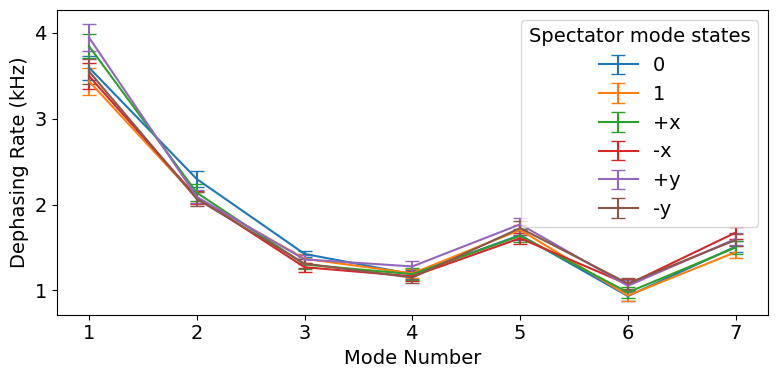

In [251]:
mode_list = [1, 2, 3, 4, 5, 6, 7]
kappas_all = []
kappas_err_all = []
fig = plt.figure(figsize=(8,4))
del_kappas =[]

for mode_no in mode_list:
    df_target = df_MBD[df_MBD['target'] == mode_no]
    kappas = df_target['kappas'].values
    kappa_errs = df_target['kappa_errs'].values

    kappas_all.append(kappas )#- kappas[0])
    kappas_err_all.append(np.sqrt(np.square(kappa_errs) ))#+ np.square(kappa_errs[0])) )

    # print max deviation with error
    del_kappa = abs(min(kappas) - max(kappas)) *1e3
    del_kappas.append(del_kappa *1e-3)
    del_kappa_err = np.sqrt(np.square(kappa_errs[0]) + np.square(kappa_errs[-1])) * 1e3
    # print kappa with err as well as associated time
    print(f'Storage {mode_no}: {del_kappa:.2f} +/- {del_kappa_err:.2f} kHz')
    print(f'Time: {1/del_kappa:.2f} +/- {1/del_kappa_err:.2f} ms')
    

state_labels = ['0', '1', '+x', '-x', '+y', '-y']
kappas_t = np.array(kappas_all).T * 1e3
kappa_errs_t = np.array(kappas_err_all).T * 1e3

for state_idx in range(6):
    plt.errorbar(mode_list, kappas_t[state_idx], yerr=kappa_errs_t[state_idx], label=state_labels[state_idx], capsize=5)
    del_kappa = abs(min(kappas_t[state_idx]) - max(kappas_t[state_idx]))
    #print(f'State {state_labels[state_idx]}: {del_kappa:.2f} kHz')

plt.xlabel('Mode Number')
plt.ylabel('Dephasing Rate (kHz)')
plt.legend(title ='Spectator mode states')
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [252]:
# teh deviation from the blue curve is the MBD depahsing error 
MBD_idle_errs = []
for idx, mode in enumerate(modes):
    f0g1_idle_time = df_master[df_master['Mode'] == mode]['f0g1_other_spec_targ_idle'].values[0]
    M1_Si_idle_time = df_master[df_master['Mode'] == mode]['M1_Si_other_spec_targ_idle'].values[0]
    MBD_idle_err = del_kappas[idx] * (f0g1_idle_time + M1_Si_idle_time)
    MBD_idle_errs.append(MBD_idle_err)
df_master['MBD_idle_err'] = MBD_idle_errs

In [253]:
df_master.keys

<bound method NDFrame.keys of   Mode  gate_time  f0g1_other_spec_targ_idle  M1_Si_other_spec_targ_idle  \
0   S1   0.977143                   5.314091                    8.972618   
1   S2   1.130904                   5.314091                    8.818856   
2   S3   1.333910                   5.314091                    8.615850   
3   S4   1.254287                   5.314091                    8.695473   
4   S5   1.973198                   5.314091                    7.976562   
5   S6   1.595310                   5.314091                    8.354450   
6   S7   1.685008                   5.314091                    8.264752   

   kappa_t1s (MHz)  kappa_T2 (MHz)  coherence_err  idle:coherence_err  \
0         0.002791        0.004243       0.060617            0.060617   
1         0.000797        0.002643       0.037358            0.037358   
2         0.001252        0.001477       0.020570            0.020570   
3         0.001674        0.001240       0.023451            0.023451

In [254]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),coherence_err,idle:coherence_err,gate: coherence_err,gate_mbd_err,thermal_photon_err,idle_err_due_to_spec_gates,MBD_idle_err,idle:decay_err,idle:dephasing_err,gate: decay_err,gate: dephasing_err,kappa_T2_echo (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791,0.004243,0.060617,0.060617,0.004146,0.010,0.0125,0.029552,0.007280,0.039874,0.005965,0.002727,0.000408,0.001813
1,S2,1.130904,5.314091,8.818856,0.000797,0.002643,0.037358,0.037358,0.002989,0.010,0.0125,0.019906,0.003284,0.011263,0.003833,0.000901,0.000307,0.000670
2,S3,1.333910,5.314091,8.615850,0.001252,0.001477,0.020570,0.020570,0.001970,0.002,0.0125,0.013919,0.002157,0.017434,0.001917,0.001669,0.000184,0.000763
3,S4,1.254287,5.314091,8.695473,0.001674,0.001240,0.023451,0.023451,0.002100,0.010,0.0125,0.009817,0.001822,0.023451,0.002682,0.002100,0.000240,0.001028
4,S5,1.973198,5.314091,7.976562,0.002811,0.001690,0.037365,0.037365,0.005547,0.002,0.0125,0.007155,0.002151,0.037365,0.001354,0.005547,0.000201,0.001508
5,S6,1.595310,5.314091,8.354450,0.001696,0.000934,0.023187,0.023187,0.002706,0.004,0.0250,0.022331,0.002007,0.023187,0.001445,0.002706,0.000169,0.000954
6,S7,1.685008,5.314091,8.264752,0.002694,0.001507,0.036581,0.036581,0.004539,0.004,0.0125,0.005735,0.003094,0.036581,0.001313,0.004539,0.000163,0.001444


### Gate
Dual Rail RB in presence of spectators   

In [29]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters_withSingleSpec.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)
df_rb_spec = pd.read_csv(file_path)
df_rb_spec.keys()

Index(['target', 'spectator', 'file_list', 'name', 'fids_list',
       'fids_post_list', 'depth_list', 'p_survival', 'p_survival_err'],
      dtype='object')

In [31]:
df_rb_spec

,target,spectator,file_list,name,fids_list,fids_post_list,depth_list,p_survival,p_survival_err
0,1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.910093526571017, 0.8954892874542445, 0.8512...","[0.9799832506787038, 0.9710116812063394, 0.933...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996843,0.000271
1,1,3,"[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9222854589478902, 0.909096866749857, 0.8911...","[0.992736101084076, 0.9909399088476863, 0.9901...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996488,0.000067
2,1,4,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9276039967171705, 0.9150756288711042, 0.900...","[0.99271075837015, 0.9913995181913406, 0.98861...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996772,0.000108
3,1,5,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9352654272919326, 0.9244829715535151, 0.908...","[0.9928800543427093, 0.9921072905953487, 0.990...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996743,0.000092
4,1,6,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9204824035487779, 0.9138329812855798, 0.900...","[0.9880122050514494, 0.9885650752859831, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996872,0.000132
5,1,7,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9327589684002223, 0.9215107080122759, 0.908...","[0.9927216181251227, 0.9921485442521224, 0.991...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996782,0.000067
6,2,1,"[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9278776650426049, 0.925440975814047, 0.9167...","[0.9916436964152529, 0.9907233329806933, 0.989...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997563,0.000038
7,2,3,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9057421088234281, 0.8822340900901485, 0.847...","[0.9735317841050743, 0.9574914777165434, 0.925...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997336,0.000395
8,2,4,"[112, 113, 114, 115, 116, 117, 118, 119, 120, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9298086718474624, 0.9211016305086126, 0.911...","[0.9901146062096049, 0.9895436204484327, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997454,0.000053
9,2,5,"[126, 127, 128, 129, 130, 131, 132, 133, 134, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9336954152085782, 0.9296354107338302, 0.918...","[0.9912287415956634, 0.990662039611712, 0.9893...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997464,0.000059


#### Bare exponential fitting 

In [33]:
import seaborn as sns

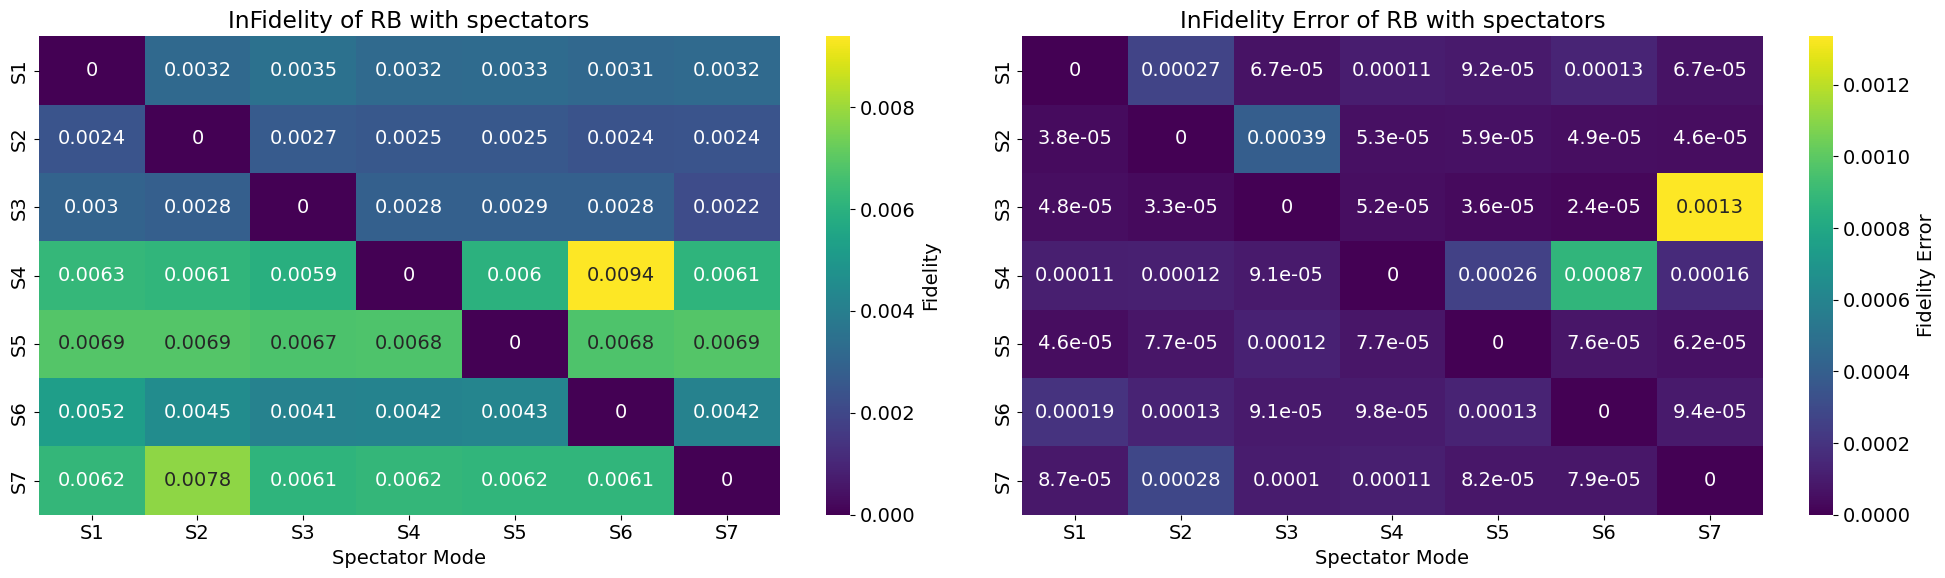

In [37]:
# load exponential fits from dataframe
infidelities = np.zeros((7, 7))
infidelities_err = np.zeros((7, 7))
for i, row in df_rb_spec.iterrows():
    target = row['target']
    spec = row['spectator']
    fid = row['p_survival']
    fid_err = row['p_survival_err']
    infidelities[target -1][spec -1] = 1-fid
    infidelities_err[target -1][spec -1] = fid_err

#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities, ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode')

sns.heatmap(infidelities_err, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_xlabel('Spectator Mode')

plt.tight_layout()




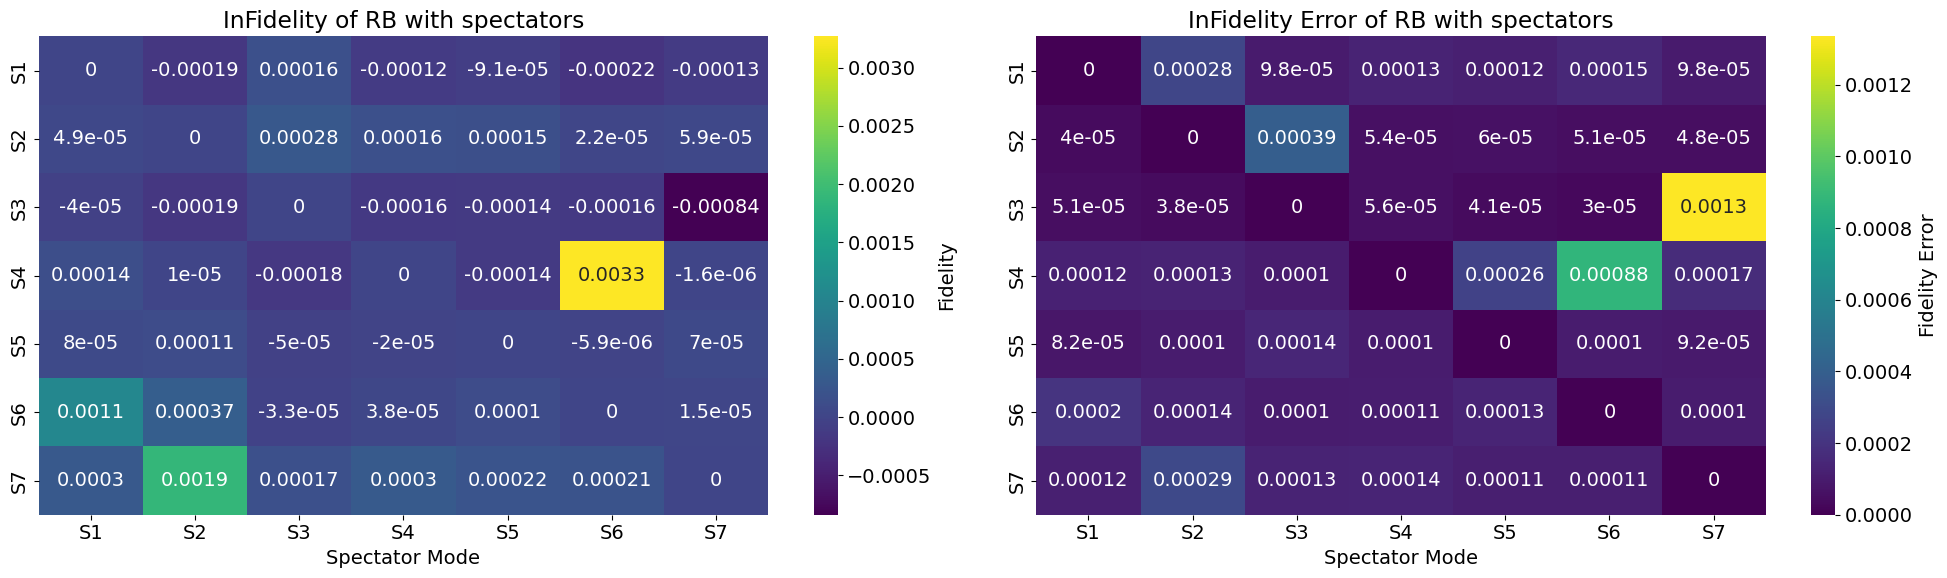

In [40]:
# from the infidelities, get rid of infidelity of bare BS
infidelities_due_to_spec = np.zeros((7, 7))
infidelities_due_to_spec_err = np.zeros((7, 7))

for i, row in df_rb_spec.iterrows():
    target = row['target']
    spec = row['spectator']
    fid = row['p_survival']
    fid_err = row['p_survival_err']
    bare_fid = df_bs[df_bs['Mode'] == target]['fid'].values[0]
    bare_fid_err = df_bs[df_bs['Mode'] == target]['fid_err'].values[0]
    infidelities_due_to_spec[target -1][spec -1] = 1-fid - (1-bare_fid)
    infidelities_due_to_spec_err[target -1][spec -1] = np.sqrt(np.square(fid_err) + np.square(bare_fid_err))

#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities_due_to_spec, ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode')

sns.heatmap(infidelities_due_to_spec_err, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_xlabel('Spectator Mode')

plt.tight_layout()

In [38]:
df_bs.keys()


Index(['Mode', 'file_list', 'name', 'fids_list', 'fids_post_list', 'fid',
       'fid_err', 'fid_post', 'fid_post_err', 'Depth fit up to ', 'depth_list',
       'gg_list', 'ge_list', 'eg_list', 'ee_list', 'gg_list_err',
       'ge_list_err', 'eg_list_err', 'ee_list_err', 'ebars_list',
       'ebars_post_list', 'depth_fit_up_to'],
      dtype='object')

#### Fitting by eye using the formula

In [41]:
# fit by eye 
eps_matrix = [[0, 0.003, 0.0005, 0, 0, 0, 0 ],
              [0, 0, 0.004, 0, 0, 0, 0],
              [0 for i in range(7)],
              [0,0,0,0,0,0.005,0],
              [0 for i in range(7)],
              [0.001, 0, 0, 0, 0, 0, 0],
              [0, 0.002, 0, 0, 0, 0, 0]] # for alpha = 1

In [46]:
# Certain data points are fit by eye; those which are not are replaced by the exp fitted infidelity
# Set negative entries to their 0 values
for i in range(7):
    for j in range(7):
        if eps_matrix[i][j] != 0:
            infidelities_due_to_spec[i][j] = eps_matrix[i][j]
        if infidelities_due_to_spec[i][j] < 0:
            infidelities_due_to_spec[i][j] = 0



Text(0.5, 31.722222222222207, 'Spectator Mode')

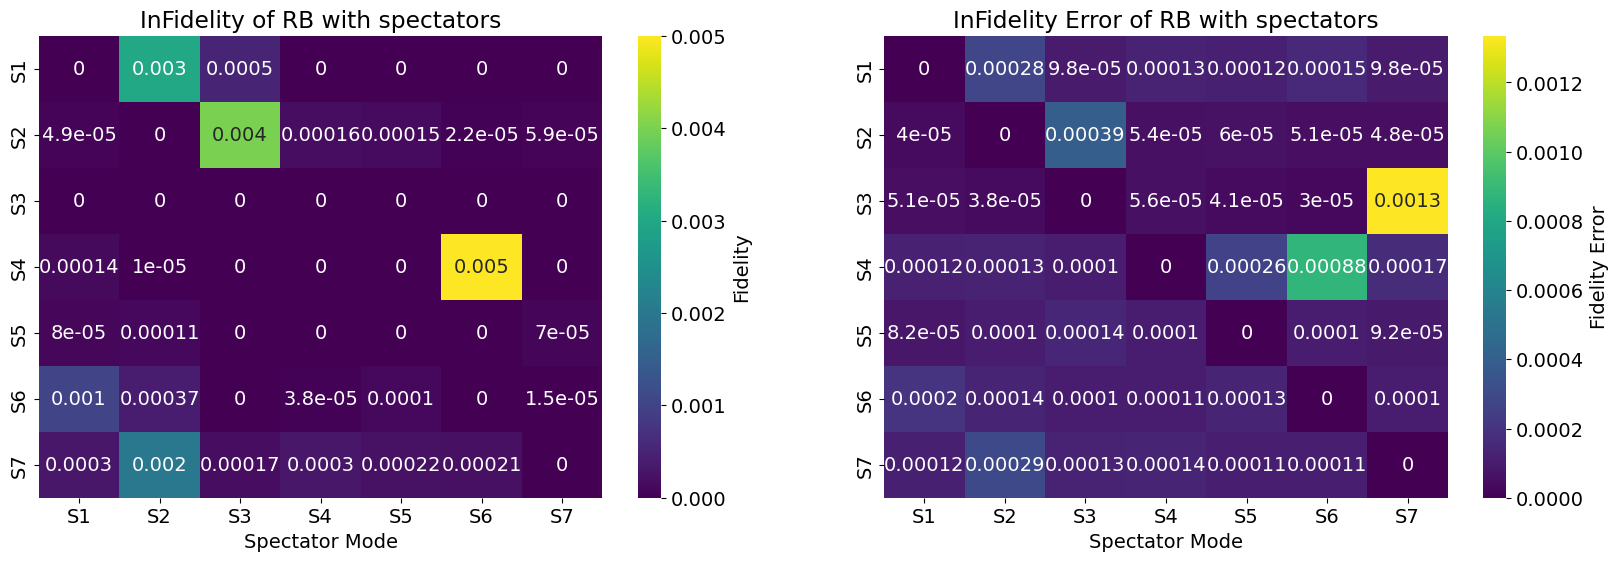

In [47]:
#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities_due_to_spec, ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode')

sns.heatmap(infidelities_due_to_spec_err, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_xlabel('Spectator Mode')

In [255]:
approx_gate_mbd_errs = np.array([0.005, 0.005, 0.001, 0.005, 0.001, 0.002, 0.002]) * 2 # 2 because in RBAM gate = 2 * Dual rail BS gate 
df_master['gate_mbd_err'] = approx_gate_mbd_errs

In [256]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),coherence_err,idle:coherence_err,gate: coherence_err,gate_mbd_err,thermal_photon_err,idle_err_due_to_spec_gates,MBD_idle_err,idle:decay_err,idle:dephasing_err,gate: decay_err,gate: dephasing_err,kappa_T2_echo (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791,0.004243,0.060617,0.060617,0.004146,0.010,0.0125,0.029552,0.007280,0.039874,0.005965,0.002727,0.000408,0.001813
1,S2,1.130904,5.314091,8.818856,0.000797,0.002643,0.037358,0.037358,0.002989,0.010,0.0125,0.019906,0.003284,0.011263,0.003833,0.000901,0.000307,0.000670
2,S3,1.333910,5.314091,8.615850,0.001252,0.001477,0.020570,0.020570,0.001970,0.002,0.0125,0.013919,0.002157,0.017434,0.001917,0.001669,0.000184,0.000763
3,S4,1.254287,5.314091,8.695473,0.001674,0.001240,0.023451,0.023451,0.002100,0.010,0.0125,0.009817,0.001822,0.023451,0.002682,0.002100,0.000240,0.001028
4,S5,1.973198,5.314091,7.976562,0.002811,0.001690,0.037365,0.037365,0.005547,0.002,0.0125,0.007155,0.002151,0.037365,0.001354,0.005547,0.000201,0.001508
5,S6,1.595310,5.314091,8.354450,0.001696,0.000934,0.023187,0.023187,0.002706,0.004,0.0250,0.022331,0.002007,0.023187,0.001445,0.002706,0.000169,0.000954
6,S7,1.685008,5.314091,8.264752,0.002694,0.001507,0.036581,0.036581,0.004539,0.004,0.0125,0.005735,0.003094,0.036581,0.001313,0.004539,0.000163,0.001444


## Thermal Photons

In [257]:
approx_thermal_photon_errs = np.array([0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.025, 0.0125])  
df_master['thermal_photon_err'] = approx_thermal_photon_errs

# Make a bar plot of the errors

## During Gates

In [258]:
df_master.keys()

Index(['Mode', 'gate_time', 'f0g1_other_spec_targ_idle',
       'M1_Si_other_spec_targ_idle', 'kappa_t1s (MHz)', 'kappa_T2 (MHz)',
       'coherence_err', 'idle:coherence_err', 'gate: coherence_err',
       'gate_mbd_err', 'thermal_photon_err', 'idle_err_due_to_spec_gates',
       'MBD_idle_err', 'idle:decay_err', 'idle:dephasing_err',
       'gate: decay_err', 'gate: dephasing_err', 'kappa_T2_echo (MHz)'],
      dtype='object')

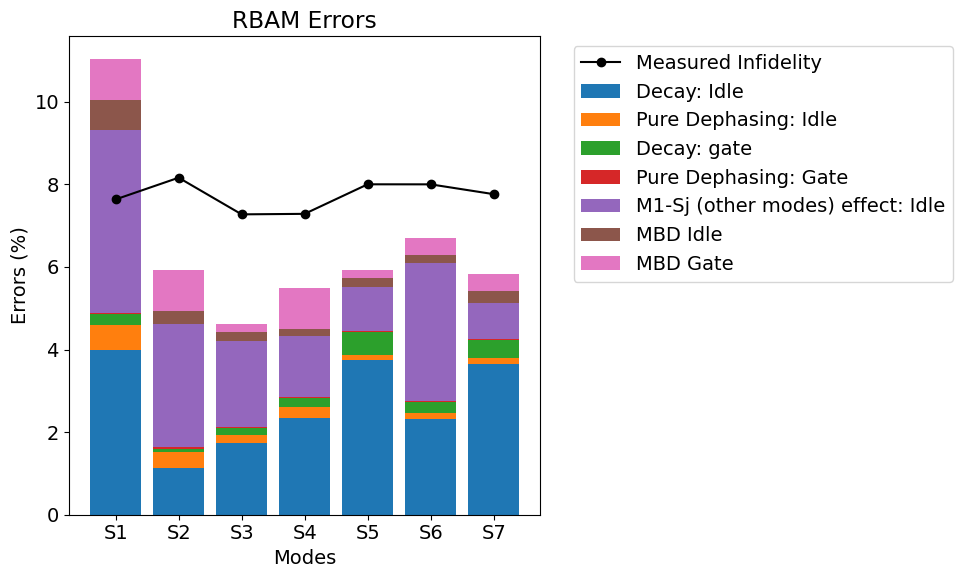

In [265]:
errors = ['idle:decay_err', 'idle:dephasing_err',
       'gate: decay_err', 'gate: dephasing_err',  'idle_err_due_to_spec_gates', 'MBD_idle_err', 'gate_mbd_err']
labels = ['Decay: Idle', 'Pure Dephasing: Idle',
       'Decay: gate', 'Pure Dephasing: Gate', 'M1-Sj (other modes) effect: Idle', 'MBD Idle', 'MBD Gate', 
       'Thermal Photons']


fig, ax = plt.subplots(figsize=(10, 6))
bars = [None] * len(errors)
# Convert modes to indices
x = np.arange(len(modes))
bottom = np.zeros(len(modes))

for idx, error in enumerate(errors):
    bars[idx] = ax.bar(x, df_master[error] * 1e2,bottom=bottom, label=labels[idx])
    bottom += df_master[error] * 1e2
    # bars.append(bar)


# plot actual fidelity 
import ast
fidelities = np.array(ast.literal_eval(df_all_rbam['fidelity'][0]))
plt.plot(x, (1-fidelities)*1e2, 'o-', label='Measured Infidelity', color='black')

# Add labels and title
ax.set_xlabel('Modes')
ax.set_ylabel('Errors (%)')
ax.set_title('RBAM Errors')
ax.set_xticks(x)
ax.set_xticklabels(modes)
# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.tight_layout()
plt.show()

In [234]:
0.002*2*6

0.024

In [232]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),coherence_err,idle:coherence_err,gate: coherence_err,gate_mbd_err,thermal_photon_err,idle_err_due_to_spec_gates,MBD_idle_err,idle:decay_err,idle:dephasing_err,gate: decay_err,gate: dephasing_err,kappa_T2_echo (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791,0.004243,0.060617,0.060617,0.004146,0.010,0.0125,0.044811,0.007280,0.039874,0.005965,0.002727,0.000408,0.001813
1,S2,1.130904,5.314091,8.818856,0.000797,0.002643,0.037358,0.037358,0.002989,0.010,0.0125,0.030010,0.003284,0.011263,0.003833,0.000901,0.000307,0.000670
2,S3,1.333910,5.314091,8.615850,0.001252,0.001477,0.020570,0.020570,0.001970,0.002,0.0125,0.020990,0.002157,0.017434,0.001917,0.001669,0.000184,0.000763
3,S4,1.254287,5.314091,8.695473,0.001674,0.001240,0.023451,0.023451,0.002100,0.010,0.0125,0.014781,0.001822,0.023451,0.002682,0.002100,0.000240,0.001028
4,S5,1.973198,5.314091,7.976562,0.002811,0.001690,0.037365,0.037365,0.005547,0.002,0.0125,0.010755,0.002151,0.037365,0.001354,0.005547,0.000201,0.001508
5,S6,1.595310,5.314091,8.354450,0.001696,0.000934,0.023187,0.023187,0.002706,0.004,0.0250,0.033680,0.002007,0.023187,0.001445,0.002706,0.000169,0.000954
6,S7,1.685008,5.314091,8.264752,0.002694,0.001507,0.036581,0.036581,0.004539,0.004,0.0125,0.008622,0.003094,0.036581,0.001313,0.004539,0.000163,0.001444


In [230]:
df_all_rbam['fidelity'][0]

'[0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]'

## During Idling 

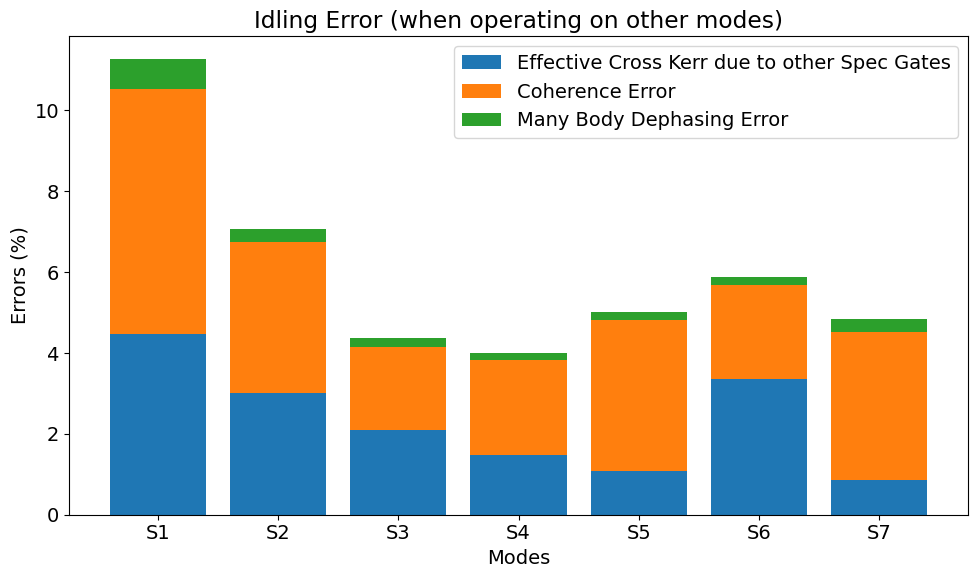

In [138]:
idle_err_due_to_spec_gates = df_master['idle_err_due_to_spec_gates'] * 1e2
coherence_err = df_master['coherence_err']*1e2
MBD_idle_err = df_master['MBD_idle_err']*1e2

# Convert modes to indices
x = np.arange(len(modes))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bar1 = ax.bar(x, idle_err_due_to_spec_gates, label='Effective Cross Kerr due to other Spec Gates')
bar2 = ax.bar(x, coherence_err, bottom=idle_err_due_to_spec_gates, label='Coherence Error')
bar3 = ax.bar(x, MBD_idle_err, bottom=idle_err_due_to_spec_gates + coherence_err, label='Many Body Dephasing Error')

# Add labels and title
ax.set_xlabel('Modes')
ax.set_ylabel('Errors (%)')
ax.set_title('Idling Error (when operating on other modes)')
ax.set_xticks(x)
ax.set_xticklabels(modes)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()